# Computer Lab 2 — continued ...

Work through Part 3 of the "Second Computer Lab" (Chapter 7) in _A Student's Guide to Python._  This exercise focuses on the Poisson distribution and waiting times.

You can use this notebook to store your code, plots, and notes, or you can write a ___script___ (see Section 3.3) that will carry out the analysis and produce the plots, and simply write your comments and observations in this notebook.  If you write a script, it should save your plot with the data and your best fit to a PDF, JPG, or PNG in this folder when it runs.

### 7.3 Rare Events
This section dives into utilizing the Poisson Distribution to analyze an extremely unfair coin where the probability of flipping heads is `P = 0.08`. The Poisson Distribution for heads comming up $l$ times in $100$ flips is: $P(l) = \dfrac{e^-8 *8^l}{l!}$ where l is an integer $>= 0 $

#### Part(a) 
Analyze the function $P(l)$ for different values of $l$

In [206]:
l = np.arange(0,21,1)
p_l = (np.exp(-8) * 8**l / sc.factorial(l))

The function of $P(l)$ gets very small very quickly for a range of $0<=l<=20$

#### Part(b)
Create an unfair coin flipped `num_flips=100` times with $P(heads) = 0.08$

In [303]:
#Random Number generator was already setup in the beginning of the notebook
N = 100 #number of trials
num_flips = 100
M = np.zeros(N)

for i in range(N):
    flip = 2*(rand(num_flips) < 0.08) - 1 #Similar coin flipping code as before but adjusted to produce a head flip for anything less than 0.08
    heads_count = (flip==1)
    count = heads_count.sum() #number of heads flipped out of N flips
    M[i] = count

#### Part(c)
Count the number of heads from the flip generator in the above cell (implemented into the for loop above) and produce a histogram of the data to see the frequency of getting M heads in N trials

(array([ 4.,  1.,  5., 31., 18., 10., 17.,  6.,  3.,  5.]),
 array([ 2. ,  3.3,  4.6,  5.9,  7.2,  8.5,  9.8, 11.1, 12.4, 13.7, 15. ]),
 <BarContainer object of 10 artists>)

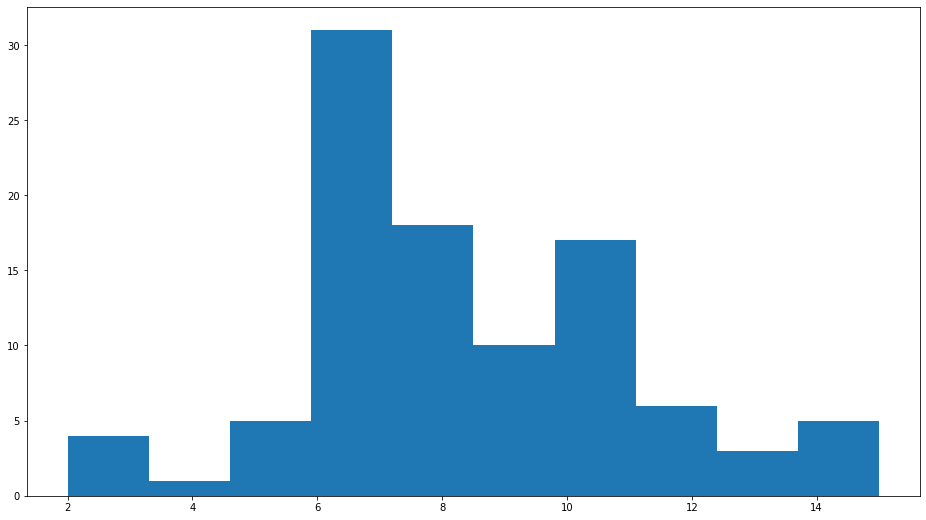

In [304]:
plt.figure(figsize = (16,9))
plt.hist(M)

#### Part(d)
Graph the Poisson distribution multiplied by N onto the above histogram

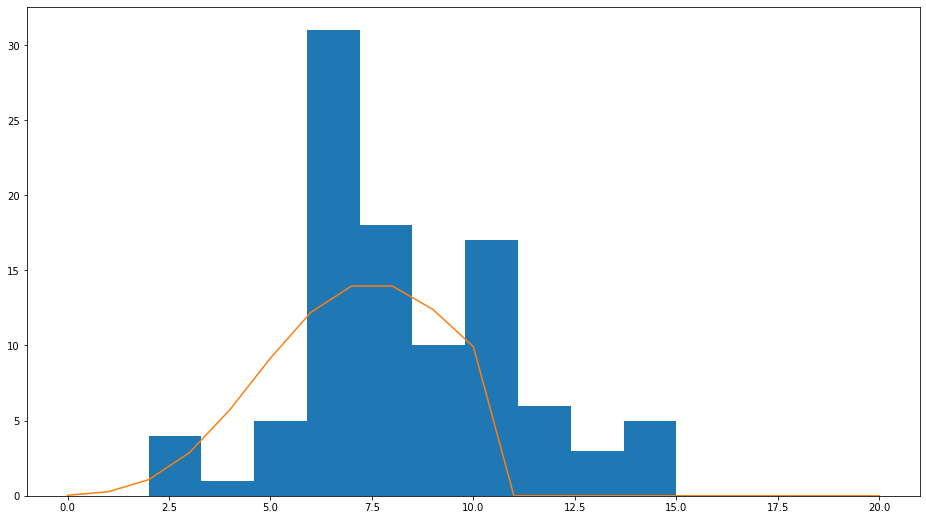

In [305]:
plt.figure(figsize = (16,9))
plt.hist(M)
l = np.arange(0,21,1)
p_l = (np.exp(-8) * 8**l / sc.factorial(l)) * N
plt.plot(p_l)

#### Part(e)
Repeating part(b-d) for N = 1,000,000

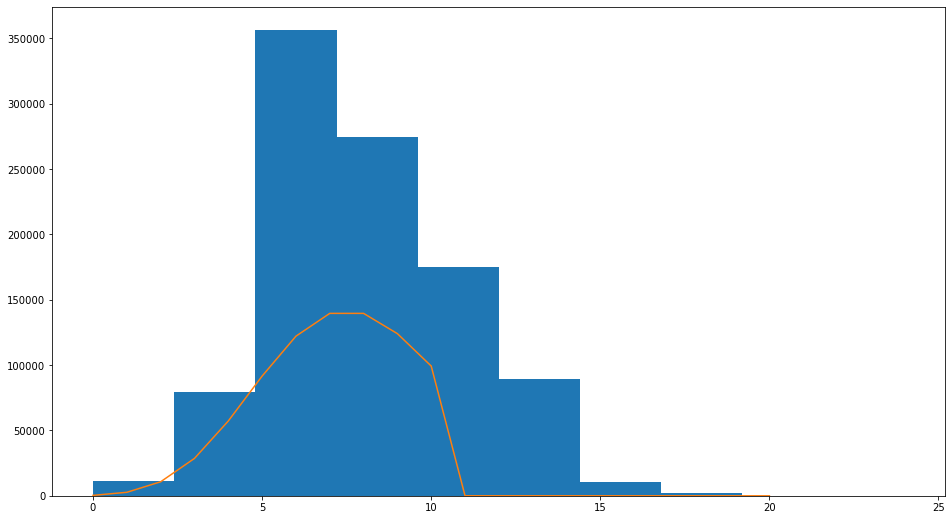

In [306]:
#Random Number generator was already setup in the beginning of the notebook
N = 1000000 #number of trials
num_flips = 100
M = np.zeros(N)

for i in range(N):
    flip = 2*(rand(num_flips) < 0.08) - 1 #Similar coin flipping code as before but adjusted to produce a head flip for anything less than 0.08
    heads_count = (flip==1)
    count = heads_count.sum() #number of heads flipped out of N flips
    M[i] = count

plt.figure(figsize = (16,9))
plt.hist(M)
l = np.arange(0,21,1)
p_l = (np.exp(-8) * 8**l / sc.factorial(l)) * N
plt.plot(p_l)

The trial for `N=1,000,000` shows a similar histogram to the above trials and matches the Poisson distribution fairly well. The most frequent number of heads aligns with the peak of the poisson distribution curve. 

### 7.3.2 Waiting Times

We can turn the random coin flip scenario into a time series called a Poisson process that should look like a long string of zeros (tails) with a few ones (heads) intermixed due to the low probability of flipping heads. 

In [387]:
num_flips = 1000 #number of flips of the unfair coin
flips = (rand(num_flips) < 0.08) - 1 + 1
ones = np.nonzero(flips)
diff_ones = np.diff(ones).flatten()

In [388]:
#finds the frequency of unique waiting times in the diff_ones array 
counts = np.unique(diff_ones,return_counts=True)

(array([16., 12.,  6., 13.,  7.,  2.,  0.,  2.,  1.,  1.,  1.,  0.,  3.,
         1.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1.  ,  4.65,  8.3 , 11.95, 15.6 , 19.25, 22.9 , 26.55, 30.2 ,
        33.85, 37.5 , 41.15, 44.8 , 48.45, 52.1 , 55.75, 59.4 , 63.05,
        66.7 , 70.35, 74.  ]),
 <BarContainer object of 20 artists>)

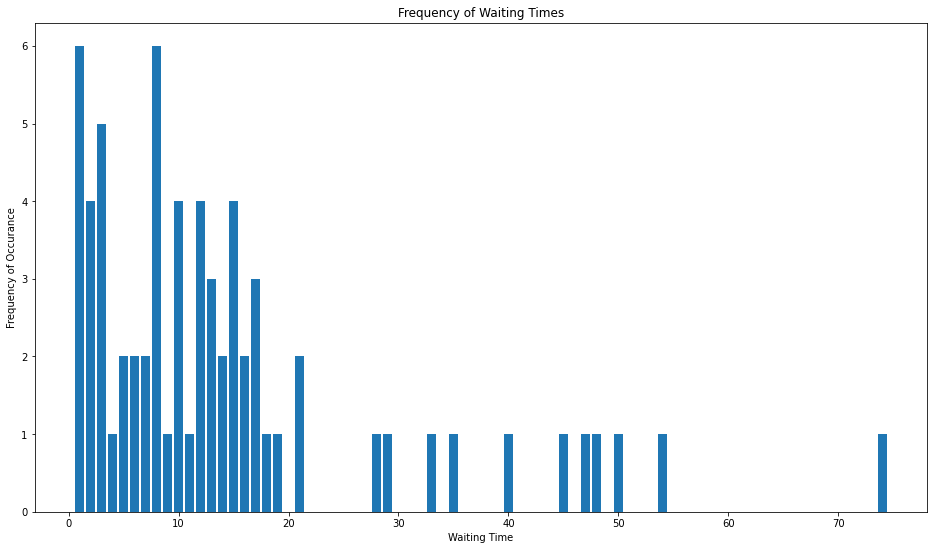

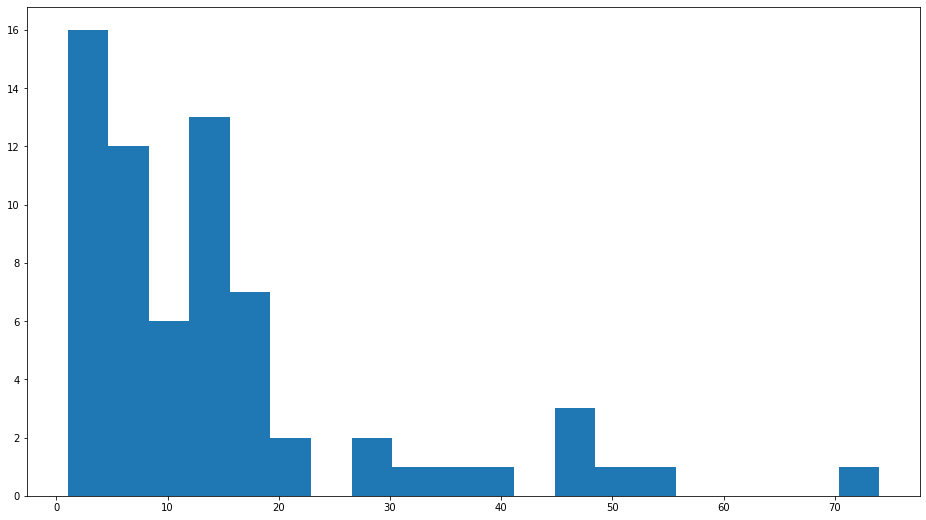

In [398]:
#Plots a bar plot of the frequency of each waiting time in the array
plt.figure(figsize = (16,9))
plt.bar(counts[0],counts[1])
plt.title('Frequency of Waiting Times')
plt.ylabel('Frequency of Occurance')
plt.xlabel('Waiting Time')

plt.figure(figsize = (16,9))
plt.hist(diff_ones,bins=20)

Text(0.5, 1.0, 'Log-Log Plot')

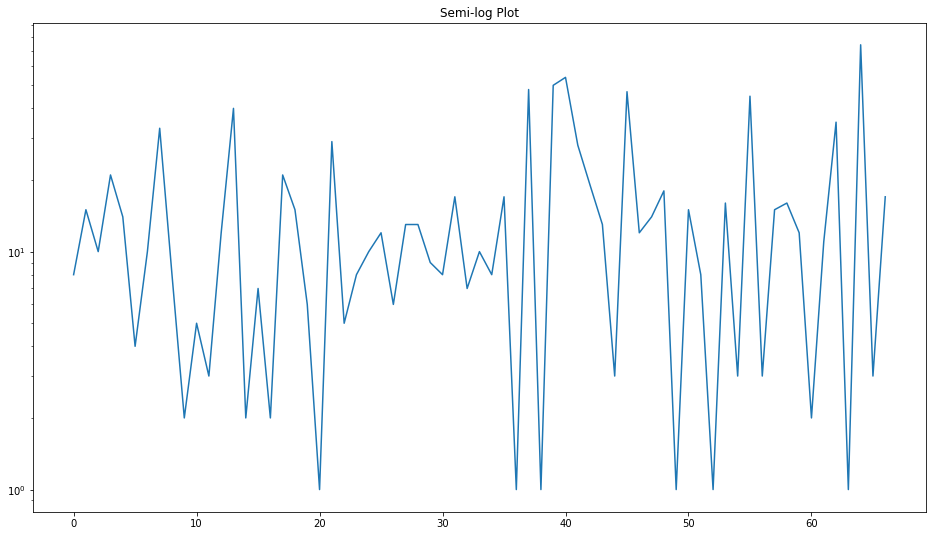

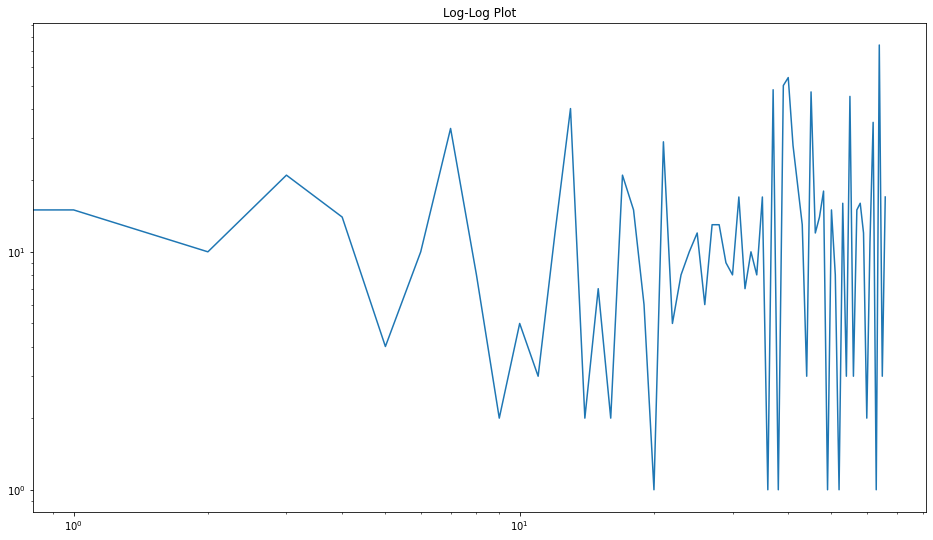

In [408]:
plt.figure(figsize = (16,9))
plt.semilogy(diff_ones)
plt.title('Semi-log Plot')
plt.figure(figsize=(16,9))
plt.loglog(diff_ones)
plt.title('Log-Log Plot')

#### Part(b)
Finding the average waiting time between heads

In [414]:
avg_wait = diff_ones.mean()
print(avg_wait)

12.4997


#### Part(c)
This section repeats part a and part b but for 1,000,000 coin flips

The average waiting time is 12.478430687447746


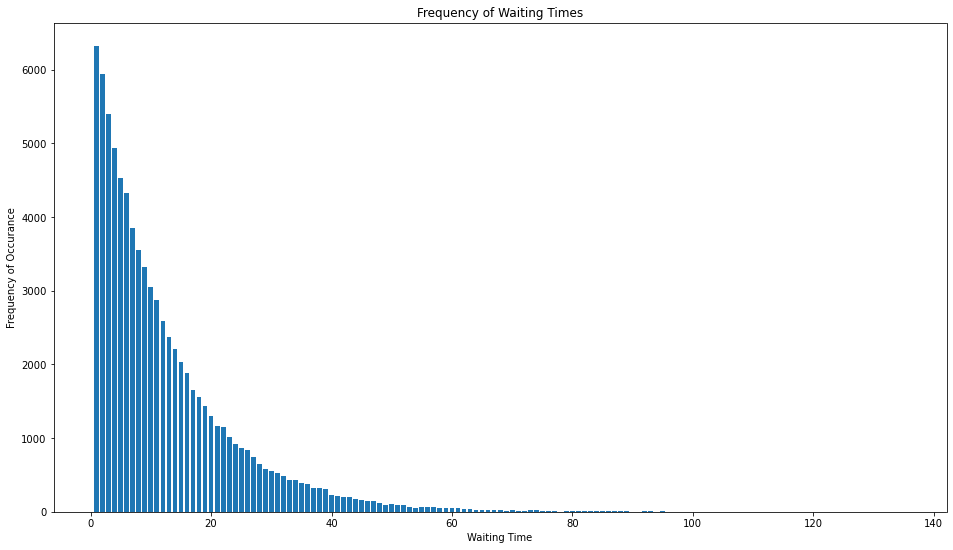

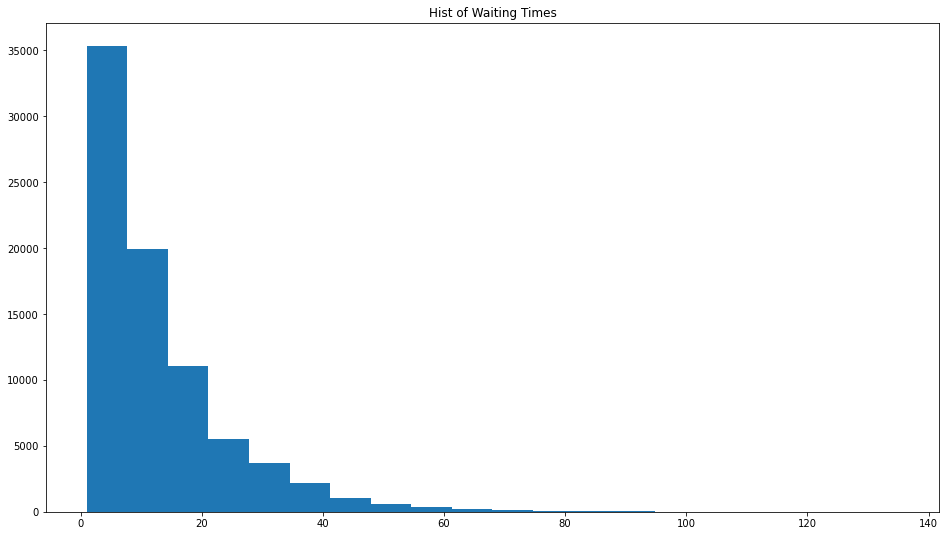

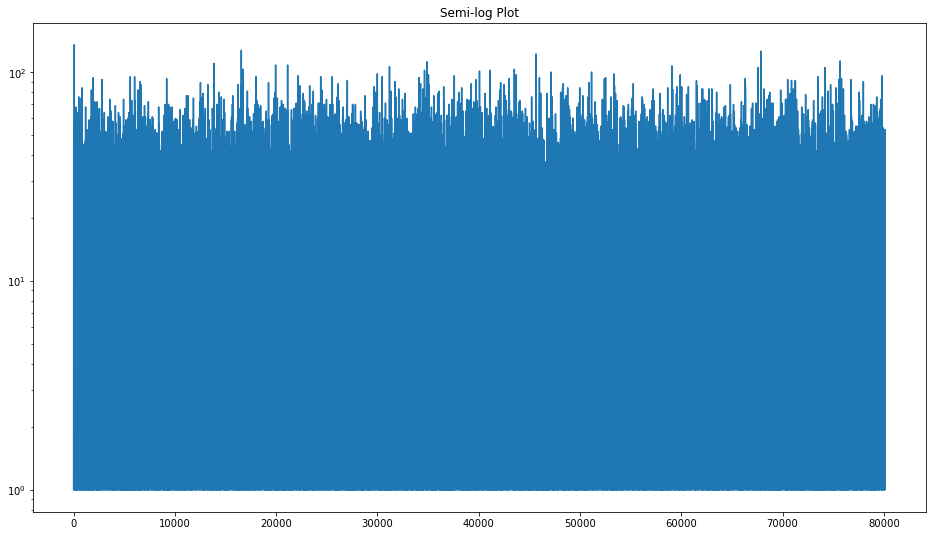

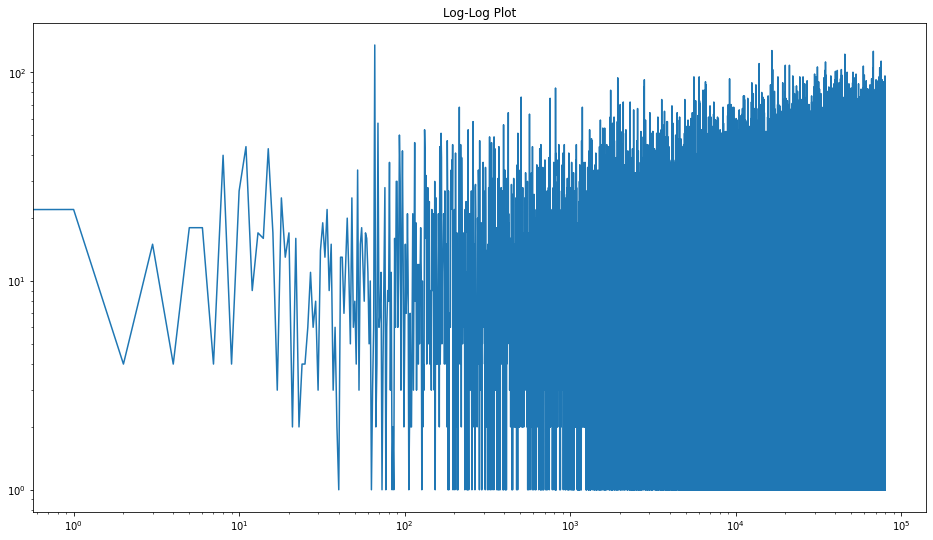

In [415]:
num_flips = 1000000 #number of flips of the unfair coin
flips = (rand(num_flips) < 0.08) - 1 + 1
ones = np.nonzero(flips)
diff_ones = np.diff(ones).flatten()

#finds the frequency of unique waiting times in the diff_ones array 
counts = np.unique(diff_ones,return_counts=True)

#Plots a bar plot of the frequency of each waiting time in the array
plt.figure(figsize = (16,9))
plt.bar(counts[0],counts[1])
plt.title('Frequency of Waiting Times')
plt.ylabel('Frequency of Occurance')
plt.xlabel('Waiting Time')

plt.figure(figsize = (16,9))
plt.hist(diff_ones,bins=20)
plt.title('Hist of Waiting Times')

plt.figure(figsize = (16,9))
plt.semilogy(diff_ones)
plt.title('Semi-log Plot')

plt.figure(figsize=(16,9))
plt.loglog(diff_ones)
plt.title('Log-Log Plot')

avg_wait = diff_ones.mean()
print('The average waiting time is {}'.format(avg_wait))

#### Misc - Testing the Poisson Distribution for different values of lambda (Just for fun)
Just testing the different outcomes of the poisson distribution for different values of lambda

Text(0.5, 1.0, 'Poisson Distribution for Different Values of Lambda')

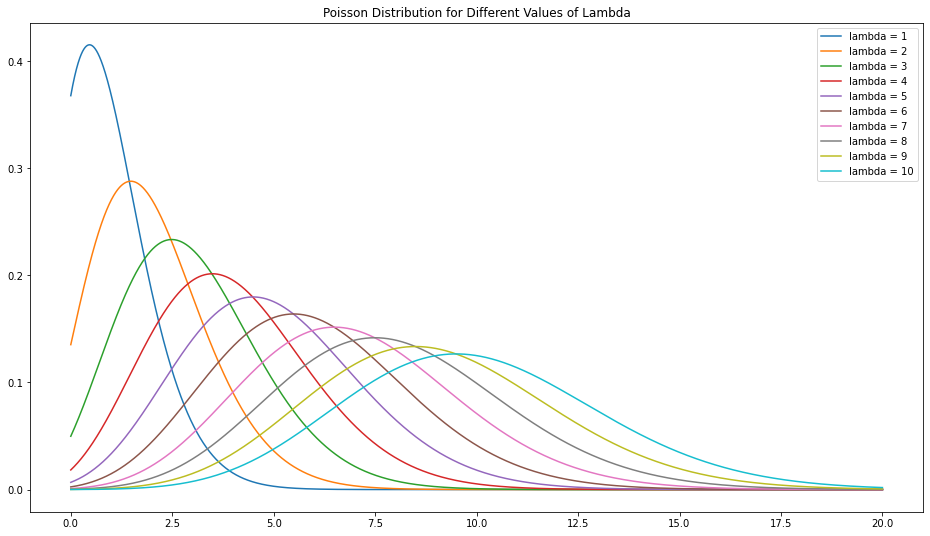

In [466]:
lam = np.arange(1,11,1)
l = np.arange(0,20,0.001)
results = np.array([np.zeros(len(l)),np.zeros(len(l)),np.zeros(len(l)),np.zeros(len(l)),np.zeros(len(l)),np.zeros(len(l)),np.zeros(len(l)),np.zeros(len(l)),np.zeros(len(l)),np.zeros(len(l))])
a = 0
plt.figure(figsize=(16,9))
for i in lam:
    P = (np.exp(-i) * i**l / sc.factorial(l)) 
    results[a] = P
    a = a+1
    plt.plot(l,P,label = "lambda = {}".format(a))
plt.legend()
plt.title('Poisson Distribution for Different Values of Lambda')